# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [124]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [94]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lat = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lon = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lat, lon)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#print(f"Number of cities in the list: {len(cities)}")
out = map(lambda x:x.title(), cities)
cities = list(out)
cities

['Hihifo',
 'New Richmond',
 'Hithadhoo',
 'Ardistan',
 'Haibowan',
 'Busselton',
 'Hermanus',
 'Yerbogachen',
 'Bolivar',
 'Barra Patuca',
 'Andenes',
 'Sfantu Gheorghe',
 'Sterling',
 'Grindavik',
 'Klaksvik',
 'Georgetown',
 'Rikitea',
 'Mahebourg',
 'Kapaa',
 'San Juan',
 'Kloulklubed',
 'Nacala',
 'Panguipulli',
 'Mataura',
 'Albany',
 'Ponta Do Sol',
 'Murgab',
 'Cape Town',
 'Luena',
 'Tsihombe',
 'Hobart',
 'Chuy',
 'Bethel',
 'Maryborough',
 'Jamestown',
 'Nikolskoye',
 'Clyde River',
 'Vagur',
 'Marzuq',
 'Olafsvik',
 'Punta Arenas',
 'Yuanping',
 'Ushuaia',
 'East London',
 'Attawapiskat',
 'Hay River',
 'Atuona',
 'Noumea',
 'Saint-Philippe',
 'Salinas',
 'Isangel',
 'Marsa Matruh',
 'Roma',
 'Santa Cruz',
 'Guerrero Negro',
 'Mogadishu',
 'Tiznit',
 'Illoqqortoormiut',
 'Bluff',
 'Najran',
 'Guarapari',
 'Yellowknife',
 'Lolua',
 'Victoria',
 'Kahului',
 'Hilo',
 'Cabedelo',
 'Zhezkazgan',
 'Korla',
 'Markova',
 'Merke',
 'Vardo',
 'Belushya Guba',
 'Tsevie',
 'Mpraeso',
 

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [95]:

url = f'https://api.openweathermap.org/data/2.5/weather?q=London&units=imperial&appid={weather_api_key}'
cityDataJson = requests.get(city_url).json()
#weather = cityDataJson['weather']
#weather[0]['main']
cityDataJson

{'coord': {'lon': -159.775, 'lat': -21.2078},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 302.18,
  'feels_like': 306.72,
  'temp_min': 302.18,
  'temp_max': 302.18,
  'pressure': 1012,
  'humidity': 74},
 'visibility': 10000,
 'wind': {'speed': 5.66, 'deg': 60},
 'clouds': {'all': 54},
 'dt': 1675904487,
 'sys': {'type': 1,
  'id': 7271,
  'country': 'CK',
  'sunrise': 1675873550,
  'sunset': 1675920049},
 'timezone': -36000,
 'id': 4035715,
 'name': 'Avarua',
 'cod': 200}

In [96]:
# Set the API base URL
#https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}

url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    

    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city.title()}&appid={weather_api_key}' # YOUR CODE HERE
    
    # Log the url, record, and set numbers

    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city.title()))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    cityDataJson = requests.get(city_url).json() # this is my city json
    # print(response.cityDataJson)
    try:
        # Parse the JSON and retrieve data
        city_weather = cityDataJson['weather']
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = cityDataJson['coord']['lat']
        city_lng = cityDataJson['coord']['lon']
        city_max_temp = cityDataJson['main']['temp_max'] # this will be in kelvin, i can probably convert this later
        city_humidity = cityDataJson['main']['humidity']
        city_clouds = cityDataJson['clouds']['all']
        city_wind = cityDataJson['wind']['speed']
        city_country = cityDataJson['sys']['country']
        city_date = cityDataJson['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found. Skipping...")
    pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Hihifo
City not found. Skipping...
Processing Record 2 of Set 1 | New Richmond
Processing Record 3 of Set 1 | Hithadhoo
Processing Record 4 of Set 1 | Ardistan
City not found. Skipping...
Processing Record 5 of Set 1 | Haibowan
City not found. Skipping...
Processing Record 6 of Set 1 | Busselton
Processing Record 7 of Set 1 | Hermanus
Processing Record 8 of Set 1 | Yerbogachen
Processing Record 9 of Set 1 | Bolivar
Processing Record 10 of Set 1 | Barra Patuca
Processing Record 11 of Set 1 | Andenes
Processing Record 12 of Set 1 | Sfantu Gheorghe
Processing Record 13 of Set 1 | Sterling
Processing Record 14 of Set 1 | Grindavik
Processing Record 15 of Set 1 | Klaksvik
Processing Record 16 of Set 1 | Georgetown
Processing Record 17 of Set 1 | Rikitea
Processing Record 18 of Set 1 | Mahebourg
Processing Record 19 of Set 1 | Kapaa
Processing Record 20 of Set 1 | San Juan
Processing Record 21 of Set 1

Processing Record 33 of Set 4 | Tomohon
Processing Record 34 of Set 4 | Kirakira
Processing Record 35 of Set 4 | New Norfolk
Processing Record 36 of Set 4 | Vestmannaeyjar
Processing Record 37 of Set 4 | Faanui
Processing Record 38 of Set 4 | Kandiari
Processing Record 39 of Set 4 | Ribeira Grande
Processing Record 40 of Set 4 | Nanortalik
Processing Record 41 of Set 4 | San Carlos De Bariloche
Processing Record 42 of Set 4 | Puerto Ayora
Processing Record 43 of Set 4 | Yanji
Processing Record 44 of Set 4 | Xining
Processing Record 45 of Set 4 | Bambous Virieux
Processing Record 46 of Set 4 | Dikson
Processing Record 47 of Set 4 | Hiriyur
Processing Record 48 of Set 4 | Mazagao
Processing Record 49 of Set 4 | Constitucion
Processing Record 0 of Set 5 | Cidreira
Processing Record 1 of Set 5 | Fairbanks
Processing Record 2 of Set 5 | Qianjiang
Processing Record 3 of Set 5 | Vila
Processing Record 4 of Set 5 | Natal
Processing Record 5 of Set 5 | Port Macquarie
Processing Record 6 of Set 

Processing Record 26 of Set 8 | Port Lincoln
Processing Record 27 of Set 8 | Esna
Processing Record 28 of Set 8 | Saleaula
City not found. Skipping...
Processing Record 29 of Set 8 | Lithakia
Processing Record 30 of Set 8 | Khani
Processing Record 31 of Set 8 | Pedernales
Processing Record 32 of Set 8 | Payyannur
Processing Record 33 of Set 8 | Takoradi
Processing Record 34 of Set 8 | Arman
Processing Record 35 of Set 8 | North Bend
Processing Record 36 of Set 8 | Saint-Augustin
Processing Record 37 of Set 8 | Havoysund
Processing Record 38 of Set 8 | Provideniya
Processing Record 39 of Set 8 | Cherskiy
Processing Record 40 of Set 8 | Hazleton
Processing Record 41 of Set 8 | Henzada
City not found. Skipping...
Processing Record 42 of Set 8 | Nizhniy Kuranakh
Processing Record 43 of Set 8 | San Patricio
Processing Record 44 of Set 8 | Qui Nhon
Processing Record 45 of Set 8 | Cap Malheureux
Processing Record 46 of Set 8 | Balkanabat
Processing Record 47 of Set 8 | Verkhnyaya Toyma
Proces

Processing Record 16 of Set 12 | Yurimaguas
Processing Record 17 of Set 12 | Mudyuga
City not found. Skipping...
Processing Record 18 of Set 12 | Zeya
Processing Record 19 of Set 12 | Upington
Processing Record 20 of Set 12 | Zheleznodorozhnyy
Processing Record 21 of Set 12 | Victoria Point
Processing Record 22 of Set 12 | Kozan
Processing Record 23 of Set 12 | Bitung
Processing Record 24 of Set 12 | Dickinson
Processing Record 25 of Set 12 | Stokmarknes
Processing Record 26 of Set 12 | Bechem
Processing Record 27 of Set 12 | Benavente
Processing Record 28 of Set 12 | Waipawa
Processing Record 29 of Set 12 | Popova
Processing Record 30 of Set 12 | Llangefni
Processing Record 31 of Set 12 | Joigny
Processing Record 32 of Set 12 | Kibala
Processing Record 33 of Set 12 | Puerto Escondido
Processing Record 34 of Set 12 | Yeniseysk
Processing Record 35 of Set 12 | Swan River
Processing Record 36 of Set 12 | Sanchor
Processing Record 37 of Set 12 | Bulawayo
Processing Record 38 of Set 12 | B

In [97]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [99]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Richmond,45.1230,-92.5366,275.97,93,0,2.06,US,1675904865
1,Hithadhoo,-0.6000,73.0833,300.58,72,99,4.65,MV,1675904865
2,Busselton,-33.6500,115.3333,294.62,55,0,5.27,AU,1675904673
3,Hermanus,-34.4187,19.2345,293.60,81,30,6.05,ZA,1675904866
4,Yerbogachen,61.2767,108.0108,252.19,98,100,2.08,RU,1675904867


In [101]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [103]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,New Richmond,45.1230,-92.5366,275.97,93,0,2.06,US,1675904865
1,Hithadhoo,-0.6000,73.0833,300.58,72,99,4.65,MV,1675904865
2,Busselton,-33.6500,115.3333,294.62,55,0,5.27,AU,1675904673
3,Hermanus,-34.4187,19.2345,293.60,81,30,6.05,ZA,1675904866
4,Yerbogachen,61.2767,108.0108,252.19,98,100,2.08,RU,1675904867


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

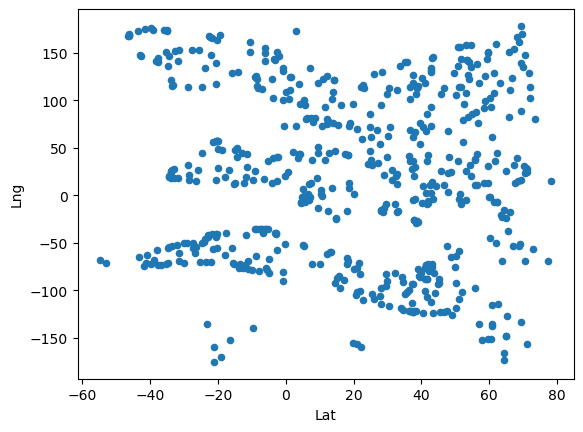

In [109]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x = 'Lat', y = 'Lng')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

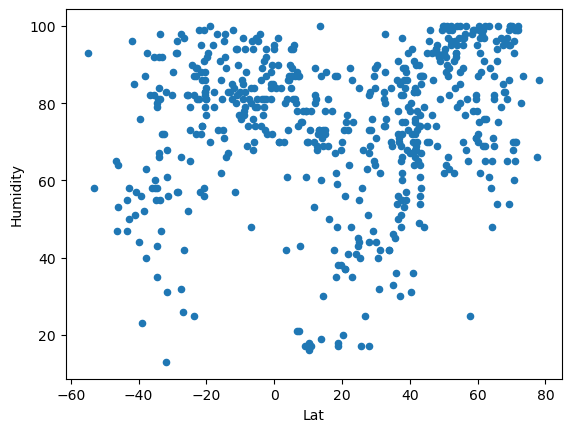

In [111]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x = 'Lat', y = 'Humidity')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

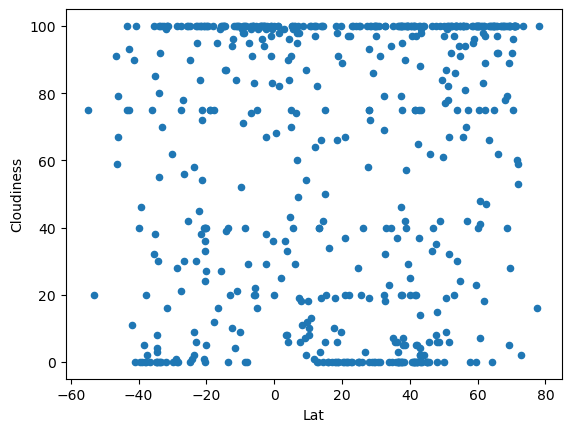

In [112]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x = 'Lat', y = 'Cloudiness')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

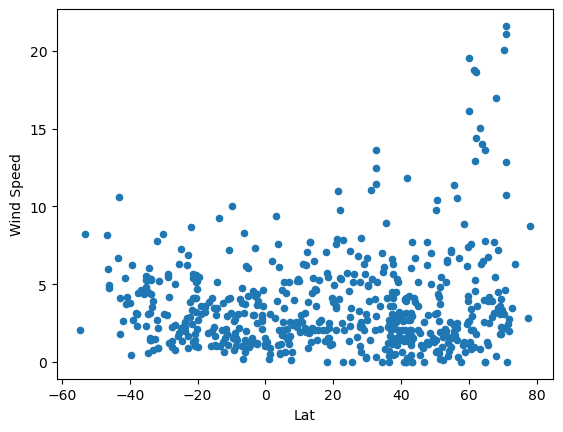

In [113]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x = 'Lat', y = 'Wind Speed')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [119]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,New Richmond,45.1230,-92.5366,275.97,93,0,2.06,US,1675904865
4,Yerbogachen,61.2767,108.0108,252.19,98,100,2.08,RU,1675904867
5,Bolivar,37.6145,-93.4105,284.34,97,100,0.45,US,1675904868
6,Barra Patuca,15.8000,-84.2833,297.90,81,0,5.25,HN,1675904869
7,Andenes,69.3143,16.1194,274.14,86,100,3.60,NO,1675904869


In [120]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Hithadhoo,-0.6000,73.0833,300.58,72,99,4.65,MV,1675904865
2,Busselton,-33.6500,115.3333,294.62,55,0,5.27,AU,1675904673
3,Hermanus,-34.4187,19.2345,293.60,81,30,6.05,ZA,1675904866
13,Rikitea,-23.1203,-134.9692,299.82,72,6,6.24,PF,1675904873
14,Mahebourg,-20.4081,57.7000,299.40,83,33,5.58,MU,1675904874


###  Temperature vs. Latitude Linear Regression Plot

The r-value is :-0.8406342120898563


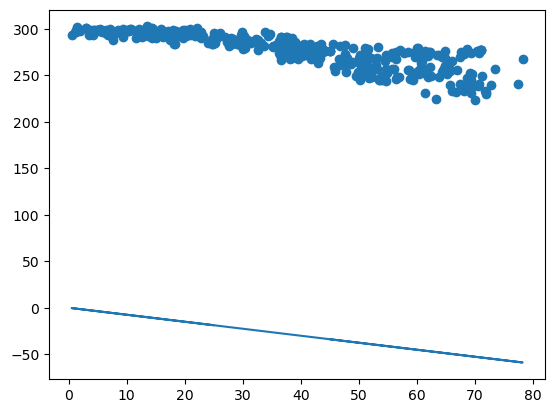

In [139]:
# Linear regression on Northern Hemispher
northLn = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
print(f"The r-value is :{northLn.rvalue}")
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.plot(northern_hemi_df['Lat'], northLn.slope*northern_hemi_df['Lat'])

The r-value is :-0.8406342120898563


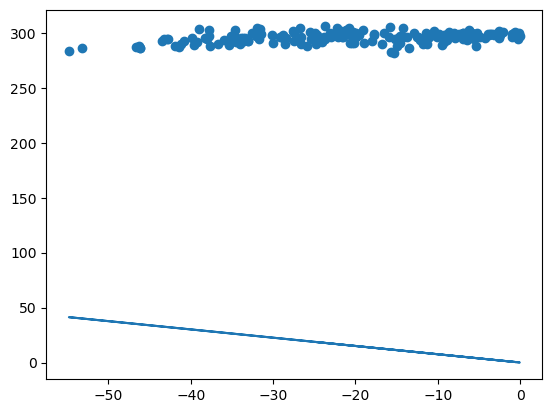

In [140]:
# Linear regression on Southern Hemisphere
southLn = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
print(f"The r-value is :{northLn.rvalue}")
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.plot(southern_hemi_df['Lat'], northLn.slope*southern_hemi_df['Lat'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


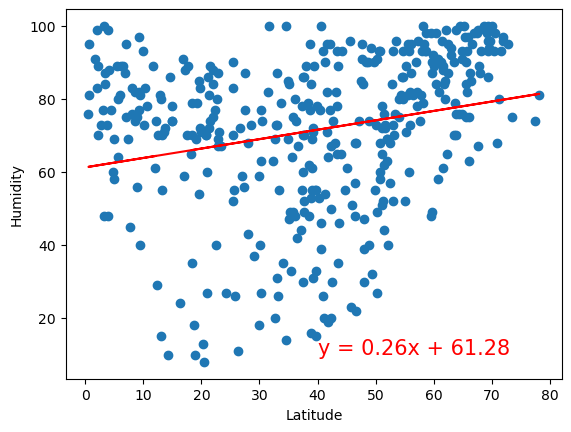

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


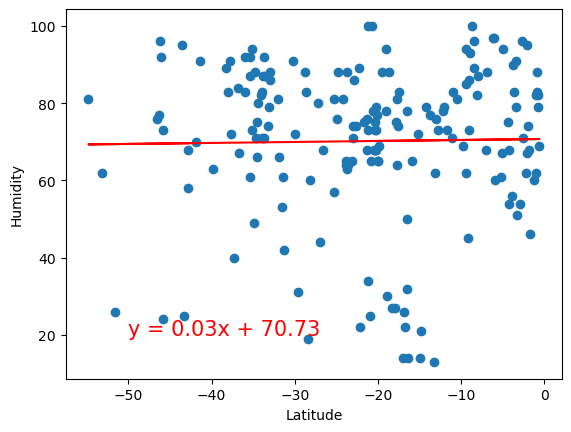

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


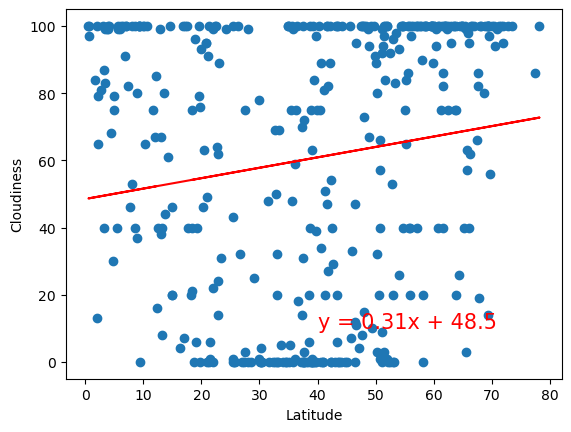

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


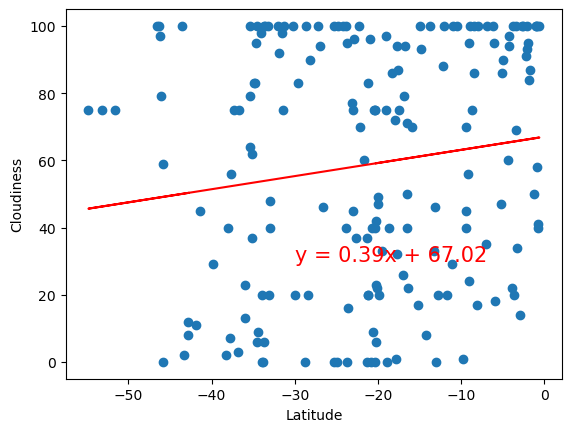

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


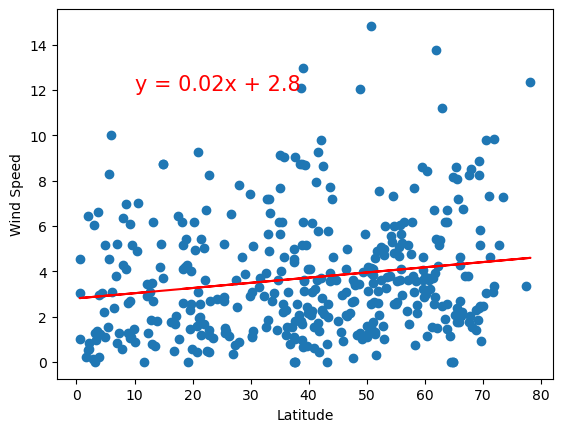

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


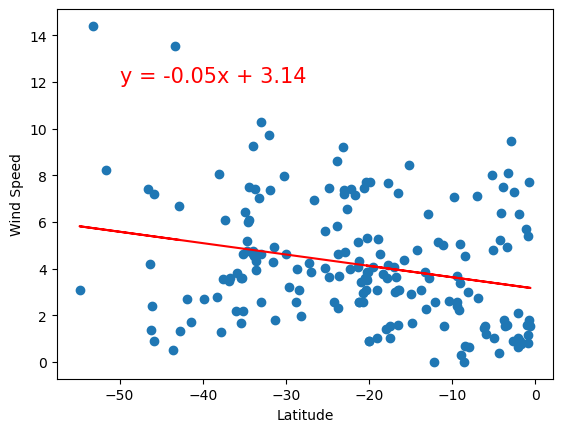

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE